<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Logistic%20Regression%20Assignment%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression: Water Pumps in Tanzania

#### Objectives
- begin with baselines for classification
- use classification metric: accuracy
- do train/validate/test split
- use scikit-learn for logistic regression
- submit to predictive modeling competitions

## Install and import libraries

In [1]:
!pip install -U pandas-profiling

  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/1d/2430053122a3c6106f7fd1ff0bc68eb73e27db8f951db70fcd942da52c7b/pytest-5.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/64/dc/6f35f114844fb12e38d60c4f3d2441a55baff7043ad4e013777dff55746c/pytest_pylint-0.14.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/c2/b3f73f4ac008bef6e75bca4992f3963b3f85942e0277237721ef1c151f0d/pylint-2.3.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/b0/c121fd1fa3419ea9bfd55c7f9c4fedfec5143208d8c7ad3ce3db6c623c21/isort-4.3.21-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d5/ad/7221a62a2dbce5c3b8c57fd18e1052c7331adc19b3f27f1561aa6e620db2/astroid-2.2.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/87/89/479dc97e18549e21

In [2]:
!pip install category_encoders

In [0]:
import category_encoders as ce
import pandas as pd
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Import data

In [0]:
LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

## Do train/validate/test split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_features, 
                                                  train_labels['status_group'], 
                                                  random_state=0)

## Begin with baselines for classification

### Majority classifier

#### Determine majority class

In [6]:
y_train.value_counts()

functional                 24237
non functional             17107
functional needs repair     3206
Name: status_group, dtype: int64

#### Make predictions

In [0]:
majority_pred = [y_train.mode()[0]] * len(X_val)

#### Evaluate accuracy

In [8]:
accuracy_score(y_val, majority_pred)

0.5402020202020202

### Logistic regression on numeric features

#### Drop non-numeric features

In [9]:
X_train_numeric = X_train.select_dtypes(include='number')
X_train_numeric.describe()

id     amount_tsh  ...    population  construction_year
count  44550.000000   44550.000000  ...  44550.000000       44550.000000
mean   37103.372233     303.402168  ...    180.715668        1302.222402
std    21480.513251    2499.313136  ...    475.340117         951.089474
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18397.000000       0.000000  ...      0.000000           0.000000
50%    37104.500000       0.000000  ...     30.000000        1986.000000
75%    55684.750000      20.000000  ...    215.000000        2004.000000
max    74247.000000  250000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

In [10]:
X_train_numeric = X_train_numeric[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']]
X_train_numeric.describe()

amount_tsh    gps_height  ...    population  construction_year
count   44550.000000  44550.000000  ...  44550.000000       44550.000000
mean      303.402168    668.239394  ...    180.715668        1302.222402
std      2499.313136    692.372863  ...    475.340117         951.089474
min         0.000000    -90.000000  ...      0.000000           0.000000
25%         0.000000      0.000000  ...      0.000000           0.000000
50%         0.000000    371.000000  ...     30.000000        1986.000000
75%        20.000000   1319.000000  ...    215.000000        2004.000000
max    250000.000000   2770.000000  ...  30500.000000        2013.000000

[8 rows x 7 columns]

#### Drop nulls if necessary.

In [11]:
X_train_numeric.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
population           0
construction_year    0
dtype: int64

In [12]:
X_train_numeric.profile_report()

#### Fit logistic regression to (numeric) training data

In [13]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate predictions on validation data

In [14]:
y_pred = model.predict(X_val[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']])

accuracy_score(y_val, y_pred)

0.5487542087542088

In [18]:
pd.Series(y_pred).value_counts()

functional        13261
non functional     1589
dtype: int64

## Explore and clean data

In [19]:
X_train.profile_report()

In [24]:
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


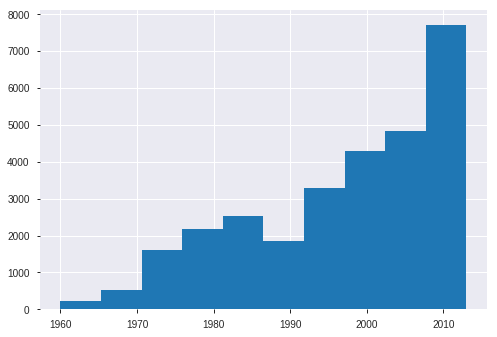

In [27]:
X_train['construction_year'][X_train['construction_year']!=0].hist();